<a href="https://colab.research.google.com/github/henriqueao/hello-world/blob/master/Trabalho_Pr%C3%A1tico_do_M%C3%B3dulo_1_Cientista_de_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Importação das bibliotecas que serão utilizadas.

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

Considere um dataset gerado pelo seguinte comando:


In [ ]:
X, y = make_blobs(n_samples=500, centers=20, random_state=999)

Gerar dados do dataset em graficos.


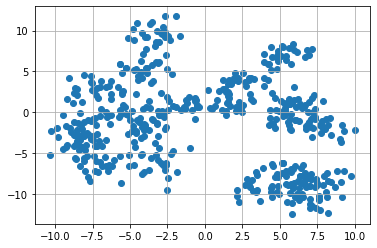

In [ ]:
plt.scatter(X[:,0], X[:,1])
plt.grid()

Executando o algorito K-Means buscando apenas 1 cluster.

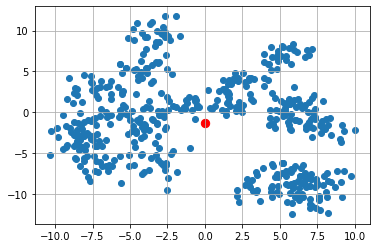

In [125]:
kmeans = KMeans(n_clusters=1, init='k-means++', max_iter=300, n_init=10)
pred_y = kmeans.fit_predict(X)

plt.scatter(X[:,0], X[:,1])
plt.grid()

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1], s=70, c='red')



Caso o algoritmo seja executado buscando apenas 1 cluster, qual será a soma dos quadrados intra-clusters (wcss) ao final da execução?

In [126]:
def optimal_number_of_clusters(wcss):

    x1, y1 = 1, wcss[0]
    x2, y2 = 19, wcss[len(wcss)-1]
    distances = []
    for i in range(len(wcss)):
        x0 = i + 1
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = sqrt((y2 - y1)**2 + (x2 - x1)**2)
        ##denominator = ((y2 - y1)**2 + (x2 - x1)**2)
        ##distances.append(numerator/denominator)
        distances.append(round(numerator/denominator,0))
    
    return distances.index(max(distances)) + 1

print(kmeans.inertia_) #exibirá o valor

31547.372471390485


Executando o algorito K-Means buscando apenas 5 clusters.

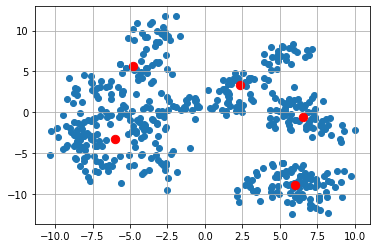

In [127]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10)
pred_y = kmeans.fit_predict(X)

plt.scatter(X[:,0], X[:,1])
plt.grid()

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1], s=70, c='red')

Caso o algoritmo seja executado buscando apenas 5 clusters, qual será a soma dos quadrados intra-clusters (wcss) ao final da execução?

In [128]:
def optimal_number_of_clusters(wcss):

    x1, y1 = 1, wcss[0]
    x2, y2 = 19, wcss[len(wcss)-1]
    distances = []
    for i in range(len(wcss)):
        x0 = i + 1
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = sqrt((y2 - y1)**2 + (x2 - x1)**2)
        ##denominator = ((y2 - y1)**2 + (x2 - x1)**2)
        ##distances.append(numerator/denominator)
        distances.append(round(numerator/denominator,0))
    
    return distances.index(max(distances)) + 1

print(kmeans.inertia_) #exibirá o valor

4717.404091931214


Considerando o dataset gerado a partir das instruções do enunciado. Qual o número ideal de clusters?




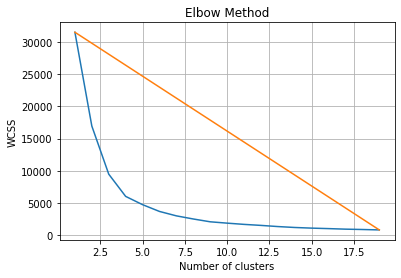

1


In [134]:
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 20), wcss)
plt.plot([1, 19],[wcss[0], wcss[len(wcss)-1]])
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()
